In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import smogn

In [2]:
DATA_PATH = os.path.join('data')
OUTPUT_CSV = os.path.join(DATA_PATH,'output','tips_with_missing.csv')
Y_COLUMN = 'tip'
NAN_COLUMN = 'smoker'
NAN_RATE = 0.05

In [3]:
tips = sns.load_dataset("tips")
df_tips1 = tips.copy()

# tipカラムを一番うしろに設定
X_columns = df_tips1.columns.to_list()
X_columns.remove(Y_COLUMN)
X = df_tips1[X_columns]
y = df_tips1[Y_COLUMN]
df_tips1 = X.join(y)

# 特定カラムに欠損値を追加
df_tips2 = df_tips1.copy()
mask = np.random.rand(len(df_tips2)) < NAN_RATE
df_tips2.loc[mask, NAN_COLUMN] = np.nan

pd.concat([df_tips2.head(),df_tips2.tail()])

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01
1,10.34,Male,No,Sun,Dinner,3,1.66
2,21.01,Male,No,Sun,Dinner,3,3.50
3,23.68,Male,No,Sun,Dinner,2,3.31
4,24.59,Female,No,Sun,Dinner,4,3.61
239,29.03,Male,No,Sat,Dinner,3,5.92
240,27.18,Female,Yes,Sat,Dinner,2,2.00
241,22.67,Male,Yes,Sat,Dinner,2,2.00
242,17.82,Male,NaN,Sat,Dinner,2,1.75
243,18.78,Female,No,Thur,Dinner,2,3.00


In [4]:
df_tips2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   sex         244 non-null    category
 2   smoker      234 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
 6   tip         244 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df_tips2.isna().sum()

total_bill     0
sex            0
smoker        10
day            0
time           0
size           0
tip            0
dtype: int64

In [6]:
# データの保存（オプション）
df_tips2.to_csv(OUTPUT_CSV)

In [7]:
df_tips2.columns.to_list()

['total_bill', 'sex', 'smoker', 'day', 'time', 'size', 'tip']

In [8]:
df_tips2[df_tips2.isnull().any(axis=1)]

,total_bill,sex,smoker,day,time,size,tip
9,14.78,Male,NaN,Sun,Dinner,2,3.23
40,16.04,Male,NaN,Sat,Dinner,3,2.24
106,20.49,Male,NaN,Sat,Dinner,2,4.06
140,17.47,Female,NaN,Thur,Lunch,2,3.50
153,24.55,Male,NaN,Sun,Dinner,4,2.00
171,15.81,Male,NaN,Sat,Dinner,2,3.16
174,16.82,Male,NaN,Sun,Dinner,2,4.00
186,20.90,Female,NaN,Sun,Dinner,3,3.50
215,12.90,Female,NaN,Sat,Dinner,2,1.10
242,17.82,Male,NaN,Sat,Dinner,2,1.75


In [9]:
df_tips3 = df_tips2.dropna(how='any')
df_tips3

,total_bill,sex,smoker,day,time,size,tip
0,16.99,Female,No,Sun,Dinner,2,1.01
1,10.34,Male,No,Sun,Dinner,3,1.66
2,21.01,Male,No,Sun,Dinner,3,3.50
3,23.68,Male,No,Sun,Dinner,2,3.31
4,24.59,Female,No,Sun,Dinner,4,3.61
...,...,...,...,...,...,...,...
238,35.83,Female,No,Sat,Dinner,3,4.67
239,29.03,Male,No,Sat,Dinner,3,5.92
240,27.18,Female,Yes,Sat,Dinner,2,2.00
241,22.67,Male,Yes,Sat,Dinner,2,2.00


In [10]:
df_tips3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  234 non-null    float64 
 1   sex         234 non-null    category
 2   smoker      234 non-null    category
 3   day         234 non-null    category
 4   time        234 non-null    category
 5   size        234 non-null    int64   
 6   tip         234 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 8.8 KB


In [11]:
df_tips3.describe()

,total_bill,size,tip
count,234.000000,234.000000,234.000000
mean,19.872607,2.576923,3.004444
std,9.056791,0.960855,1.398584
min,3.070000,1.000000,1.000000
25%,13.272500,2.000000,2.000000
50%,17.850000,2.000000,2.855000
75%,24.457500,3.000000,3.587500
max,50.810000,6.000000,10.000000


# カテゴリエンコーディング

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

X = df_tips3.iloc[:, :-1]
y = df_tips3.iloc[:, -1]

categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

X_2 = X.copy()
for cat in categories:
    le = LabelEncoder()
    le = le.fit(X_2[cat])
    X_2[cat] = le.transform(X_2[cat])
    X_2[cat] = X_2[cat].astype('category')
    print(X_2[cat].value_counts())

X_2

['sex', 'smoker', 'day', 'time']
sex
1    150
0     84
Name: count, dtype: int64
smoker
0    146
1     88
Name: count, dtype: int64
day
1    82
2    72
3    61
0    19
Name: count, dtype: int64
time
0    167
1     67
Name: count, dtype: int64


,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4
...,...,...,...,...,...,...
238,35.83,0,0,1,0,3
239,29.03,1,0,1,0,3
240,27.18,0,1,1,0,2
241,22.67,1,1,1,0,2


# モデル学習

In [13]:
X2_train, X2_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X2_train, y_train)
y_pred = rf_model.predict(X2_test)

print(y_pred)
print(r2_score(y_test, y_pred))

[2.94905631 3.34195748 3.13560444 2.0282475  3.17427768 4.23197054
 3.49451343 4.70271533 1.89092355 2.02185926 2.0282475  3.39009652
 2.26989303 3.22409638 2.27427939 2.29649338 3.10550188 2.94773598
 2.40132568 3.09039917 2.23525163 4.60112228 2.23699884 1.85499487
 3.3478206  2.33131579 3.40917326 3.18542259 2.21551631 3.25448116
 2.37557607 3.17419094 4.12877561 4.03451939 2.08600843 2.3837725
 2.02185926 2.47218523 2.26086558 3.84701381 3.29801814 3.70529757
 2.34280958 2.03835804 4.70271533 4.35395341 2.36485659 2.17629464
 3.70522178 2.95012587 2.34373703 3.36573593 4.06418739 3.32980485
 2.44982584 2.25966316 3.12820265 2.0282475  3.68672726 3.37444739
 3.52712153 1.89311973 3.41972283 3.71732405 2.40132568 1.89320122
 4.08488351 2.23108325 3.74826199 1.89442355 1.97192972]
0.48983946924169963


In [14]:
y_test.head()

71     3.00
214    6.50
188    3.50
10     1.71
130    1.50
Name: tip, dtype: float64

In [15]:
y_pred

array([2.94905631, 3.34195748, 3.13560444, 2.0282475 , 3.17427768,
       4.23197054, 3.49451343, 4.70271533, 1.89092355, 2.02185926,
       2.0282475 , 3.39009652, 2.26989303, 3.22409638, 2.27427939,
       2.29649338, 3.10550188, 2.94773598, 2.40132568, 3.09039917,
       2.23525163, 4.60112228, 2.23699884, 1.85499487, 3.3478206 ,
       2.33131579, 3.40917326, 3.18542259, 2.21551631, 3.25448116,
       2.37557607, 3.17419094, 4.12877561, 4.03451939, 2.08600843,
       2.3837725 , 2.02185926, 2.47218523, 2.26086558, 3.84701381,
       3.29801814, 3.70529757, 2.34280958, 2.03835804, 4.70271533,
       4.35395341, 2.36485659, 2.17629464, 3.70522178, 2.95012587,
       2.34373703, 3.36573593, 4.06418739, 3.32980485, 2.44982584,
       2.25966316, 3.12820265, 2.0282475 , 3.68672726, 3.37444739,
       3.52712153, 1.89311973, 3.41972283, 3.71732405, 2.40132568,
       1.89320122, 4.08488351, 2.23108325, 3.74826199, 1.89442355,
       1.97192972])

In [16]:
df_pred = pd.DataFrame(y_test)
df_pred['y_pred'] = y_pred
df_pred.head()

,tip,y_pred
71,3.00,2.949056
214,6.50,3.341957
188,3.50,3.135604
10,1.71,2.028247
130,1.50,3.174278


Text(0, 0.5, 'pred')

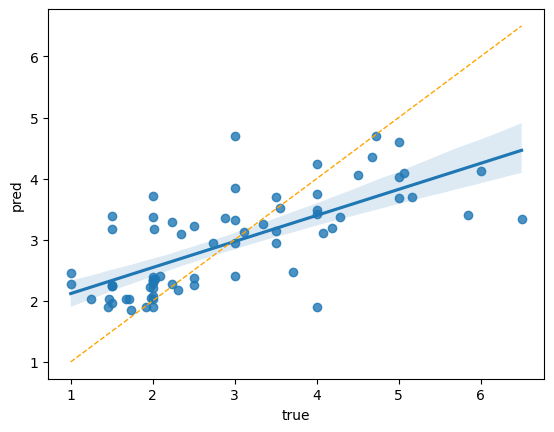

In [17]:
ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred[Y_COLUMN].min(), df_pred[Y_COLUMN].max()]
sns.regplot(x=df_pred[Y_COLUMN], y=df_pred.y_pred)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

- カテゴリカル変数を含んでいる点は良い
- モデルの性能が低いのが気にかかる（決定係数で0.35）
- 外れ値を除去すれば上がるかな。。。

## OneHotEncodingを試す

In [18]:
categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

['sex', 'smoker', 'day', 'time']


In [19]:
X3_train = pd.get_dummies(X2_train, columns=categories)
X3_test = pd.get_dummies(X2_test, columns=categories)

In [20]:
rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X3_train, y_train)
y_pred = rf_model.predict(X3_test)

print(y_pred)
print(r2_score(y_test, y_pred))

[2.89041193 3.34922554 3.10143464 2.01319255 3.15968309 4.35265093
 3.47923212 4.5746836  1.79918135 2.01635571 1.93194612 3.44000272
 2.25774227 3.2325692  2.26090543 2.29656433 3.08433963 2.88524054
 2.39975586 3.09221346 2.20713673 4.79875803 2.20968853 1.82056161
 3.32443639 2.3473082  3.50827208 3.1561838  2.23583174 3.26613429
 2.35982159 3.16427202 4.40088872 3.97745234 2.09586203 2.36809135
 1.93510927 2.41787229 2.25168689 3.96194602 3.38730691 3.62893532
 2.34811279 1.94272602 4.76745965 4.48216989 2.36824432 2.17913587
 3.72790086 2.89356125 2.32501097 3.35834136 4.2987618  3.30764663
 2.24497136 2.24652551 3.49377143 1.93194612 3.72091447 3.37328113
 3.74065922 1.90246605 3.60680353 3.62332318 2.39975586 1.82125509
 4.14159191 2.21576006 3.78141268 1.81621545 1.92471699]
0.5050991783384395


Text(0, 0.5, 'pred')

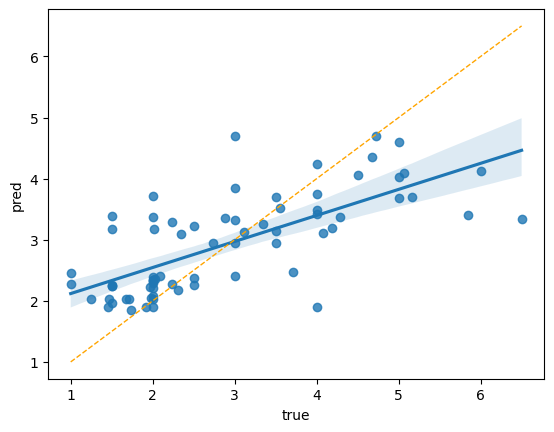

In [21]:
ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred[Y_COLUMN].min(), df_pred[Y_COLUMN].max()]
sns.regplot(x=df_pred[Y_COLUMN], y=df_pred.y_pred)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

In [22]:
df_train = X2_train.join(y_train)
pd.concat([df_train.head(),df_train.tail()])

,total_bill,sex,smoker,day,time,size,tip
129,22.82,1,0,3,1,3,2.18
81,16.66,1,0,3,1,2,3.40
5,25.29,1,0,2,0,4,4.71
58,11.24,1,1,1,0,2,1.76
123,15.95,1,0,3,1,2,2.00
109,14.31,0,1,1,0,2,4.00
15,21.58,1,0,2,0,2,3.92
94,22.75,0,0,0,0,2,3.25
187,30.46,1,1,2,0,5,2.00
104,20.92,0,0,1,0,2,4.08


In [23]:
df_train.isna().sum()

total_bill    0
sex           0
smoker        0
day           0
time          0
size          0
tip           0
dtype: int64

In [24]:
# # SMOGNを使用してオーバーサンプリング
# # rel_thresを調整して目標サイズに近づける
# rel_thres = 0.001  # 開始値
# data_resampled = smogn.smoter(
#     data=df_train.reset_index(drop=True),## training set  (pandas dataframe)
#     y=Y_COLUMN,  # 目的変数
#     k=3,                    ## num of neighs for over-sampling  (pos int)
#     samp_method='extreme',  ## % over / under sample  ("balance" or extreme")
#     drop_na_col=True,       ## auto drop columns with nan's  (bool)
#     drop_na_row=True,       ## auto drop rows with nan's  (bool)
#     replace=False,          ## sampling replacement  (bool)
#     rel_thres=rel_thres,         ## relevance threshold considered rare  (pos real)
#     rel_method='auto',      ## relevance method  ("auto" or "manual")
#     rel_xtrm_type = "both",   ## distribution focus  ("high", "low", "both")
#     rel_coef = 1.5,           ## coefficient for box plot  (pos real)
#     rel_ctrl_pts_rg = None    ## input for "manual" rel method  (2d array)
# )

# df_train2 = pd.concat([df_train, data_resampled], axis=0).reset_index(drop=True)

In [25]:
# X4_train = df_train2.iloc[:,:-1]
# y4_train = df_train2.iloc[:,-1]

# rf_model = RandomForestRegressor(max_depth=3)
# rf_model.fit(X4_train, y4_train)
# y_pred = rf_model.predict(X2_test)

# print(y_pred)
# print(r2_score(y_test, y_pred))

<Axes: >

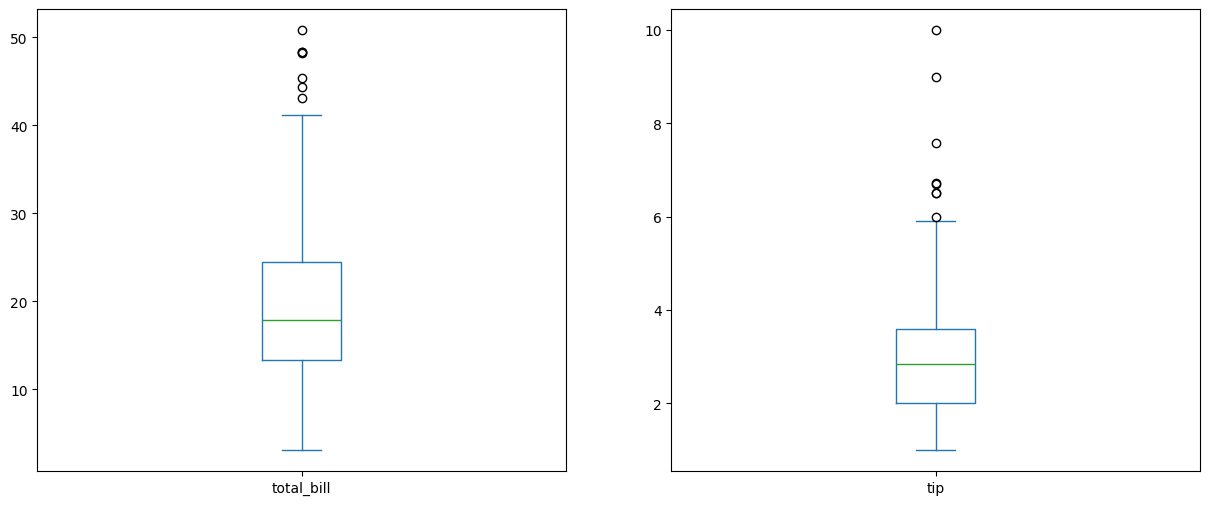

In [26]:
# 箱ひげ図の表示
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
df_tips3[['total_bill']].plot.box(ax=axes[0])
df_tips3[['tip']].plot.box(ax=axes[1])

# 外れ値を除去してみる

<Axes: >

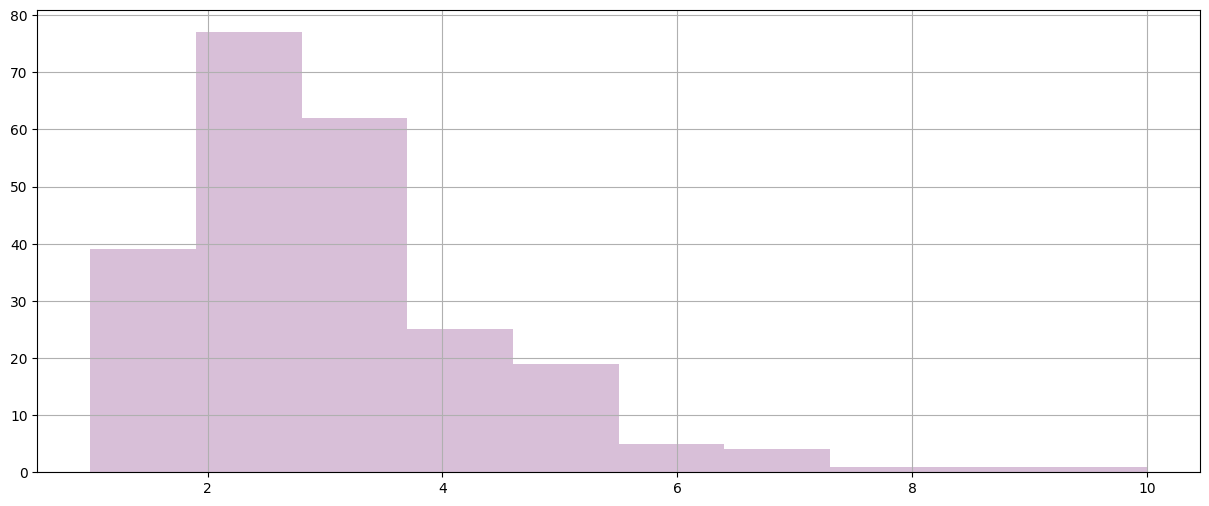

In [27]:
# ヒストグラムの表示
fig, axes = plt.subplots(figsize=(15, 6))
df_tips3['tip'].hist(color='thistle', ax=axes)

In [28]:
tip_mean = df_tips3['tip'].mean()
tip_median = df_tips3['tip'].median()
tip_sigma = df_tips3['tip'].std()

tip_mean, tip_median, tip_sigma

(np.float64(3.0044444444444443),
 np.float64(2.855),
 np.float64(1.3985835535025435))

In [29]:
df_tips3[df_tips3['tip'] > 6.5]

,total_bill,sex,smoker,day,time,size,tip
23,39.42,Male,No,Sat,Dinner,4,7.58
59,48.27,Male,No,Sat,Dinner,4,6.73
141,34.30,Male,No,Thur,Lunch,6,6.70
170,50.81,Male,Yes,Sat,Dinner,3,10.00
212,48.33,Male,No,Sat,Dinner,4,9.00


In [30]:
df_tips3[df_tips3['tip'] > (tip_median+2.5*tip_sigma)]

,total_bill,sex,smoker,day,time,size,tip
23,39.42,Male,No,Sat,Dinner,4,7.58
59,48.27,Male,No,Sat,Dinner,4,6.73
141,34.30,Male,No,Thur,Lunch,6,6.70
170,50.81,Male,Yes,Sat,Dinner,3,10.00
183,23.17,Male,Yes,Sun,Dinner,4,6.50
212,48.33,Male,No,Sat,Dinner,4,9.00
214,28.17,Female,Yes,Sat,Dinner,3,6.50


- まぁ予想はしていたけど、外れ値多いね

In [31]:
bill_mean = df_tips3['total_bill'].mean()
bill_median = df_tips3['total_bill'].median()
bill_sigma = df_tips3['total_bill'].std()

bill_mean, bill_median, bill_sigma

(np.float64(19.87260683760684),
 np.float64(17.85),
 np.float64(9.05679085312266))

In [32]:
df_tips3[df_tips3['total_bill'] > (bill_median+2.5*bill_sigma)]

,total_bill,sex,smoker,day,time,size,tip
59,48.27,Male,No,Sat,Dinner,4,6.73
102,44.30,Female,Yes,Sat,Dinner,3,2.50
142,41.19,Male,No,Thur,Lunch,5,5.00
156,48.17,Male,No,Sun,Dinner,6,5.00
170,50.81,Male,Yes,Sat,Dinner,3,10.00
182,45.35,Male,Yes,Sun,Dinner,3,3.50
184,40.55,Male,Yes,Sun,Dinner,2,3.00
197,43.11,Female,Yes,Thur,Lunch,4,5.00
212,48.33,Male,No,Sat,Dinner,4,9.00


- こちらも悪影響を及ぼしそう

In [33]:
df_tips4 = df_tips3[(df_tips3['total_bill'] < (bill_median+3*bill_sigma)) & (df_tips3['tip'] < (tip_median+3*tip_sigma))]
df_tips4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  228 non-null    float64 
 1   sex         228 non-null    category
 2   smoker      228 non-null    category
 3   day         228 non-null    category
 4   time        228 non-null    category
 5   size        228 non-null    int64   
 6   tip         228 non-null    float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 8.6 KB


- 約1割ほど減った

In [34]:
X5 = df_tips4.iloc[:,:-1]
y5 = df_tips4.iloc[:,-1]

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X5[cat])
    X5[cat] = le.transform(X5[cat])
    X5[cat] = X5[cat].astype('category')
    print(X5[cat].value_counts())

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(max_depth=3)
rf_model.fit(X5_train, y5_train)
y_pred = rf_model.predict(X5_test)

print(y_pred)
print(r2_score(y5_test, y_pred))

sex
1    144
0     84
Name: count, dtype: int64
smoker
0    142
1     86
Name: count, dtype: int64
day
1    78
2    70
3    61
0    19
Name: count, dtype: int64
time
0    161
1     67
Name: count, dtype: int64
[3.81382127 2.3206737  1.80789799 3.38348528 1.84909461 3.60495273
 2.35775032 3.59359918 2.42380527 3.20523827 3.57638446 3.15071935
 1.97041737 2.37028031 2.35775032 4.62030914 3.21775511 2.45148141
 3.7851911  4.01389783 3.61622627 1.34285171 2.48731429 2.30260997
 3.27332324 3.42101236 3.65442423 2.44612166 2.45148141 3.61622627
 3.45121714 3.16641501 2.29106945 3.89673277 2.39359568 1.87310739
 4.49670167 2.20852269 2.19598864 2.32164095 2.42087278 3.27642147
 1.48938945 4.1598758  2.20852269 1.83256491 2.30249607 1.8515547
 3.24808931 3.25688246 1.62221126 3.76673689 3.71454474 3.2462348
 3.27021363 2.45794941 1.6634497  2.25397062 3.17012054 2.38438655
 2.77129268 2.21280483 2.37456651 4.45690971 4.90891179 3.32617848
 2.25937683 3.12594624 3.1701533 ]
0.19838885366671022


- 逆にスコア下がっちゃいましたね